In [1]:
from IPython.core.interactiveshell import InteractiveShell

# Display outputs from all lines when they exist
InteractiveShell.ast_node_interactivity = "all" # "last"

import pandas as pd

pd.set_option('max_columns', None)

# Import data

## Set up meta-information

In [2]:
# Create list of users that should always be filtered out from the counts
restricted_users_list = ['AutoModerator', 'Judgement_Bot_AITA']

# Judgement tags are in {'NTA', 'YTA', 'NAH', 'ESH', 'INFO', 'SHP' (not formal after a certain point but still commonly quoted)}
potential_tags = ['NTA', 'YTA', 'NAH', 'ESH', 'INFO', 'SHP']

## Import filtered/annotated data

In [4]:
import pickle

# Base data
posts_df = pd.read_csv(f'backup_posts_df.csv')
comms_df = pd.read_csv(f'backup_comms_df.csv')
peruserpost_df = pd.read_csv(f'backup_peruserpost_df.csv')

# Annotation data

# Raw data
posts_sizefilter_df = pd.read_csv(f'backup_posts_sizefilter_df.csv')
comms_sizefilter_df = pd.read_csv(f'backup_comms_sizefilter_df.csv')

# Post graphs
with open('backup_gAll.pkl', 'rb') as f:
    gAll = pickle.load(f)

# Annotation DataFrames
ann_posts_finaljudgement_df = pd.read_csv(f'backup_ann_posts_finaljudgement_df.csv')
ann_comms_judgements_df = pd.read_csv(f'backup_ann_comms_judgements_df.csv')
ann_comms_correctness_df = pd.read_csv(f'backup_ann_comms_correctness_df.csv')
ann_peruserpost_branchiness_df = pd.read_csv(f'backup_ann_peruserpost_branchiness_df.csv')
ann_peruserpost_correctness_df = pd.read_csv(f'backup_ann_peruserpost_correctness_df.csv')

# TODO sentiment contrast analysis import

## Preview data available

In [6]:
# Main data

# all size-filtered modern posts with annotations: controversialness
print('posts_df')
posts_df[:2]

# all size-filtered modern comments with annotations: judgement, correctness
print('comms_df')
comms_df[:2]

# all per-user-post pairings with annotations: overall correctness, branchiness
print('peruserpost_df')
peruserpost_df[:2]

print('================')

# Annotations data, shouldn't be fully needed

# All size-filtered modern posts without annotations
print('posts_sizefilter_df')
posts_sizefilter_df[:2]

# All size-filtered modern comments without annotations
print('comms_sizefilter_df')
comms_sizefilter_df[:2]

# Pure annotations per size-filtered modern post: final judgements
print('ann_posts_finaljudgement_df')
ann_posts_finaljudgement_df[:2]

# Pure annotations per size-filtered modern comment: individual judgement tag
print('ann_comms_judgements_df')
ann_comms_judgements_df[:2]

# Pure annotations per size-filtered modern comment: individual correctness
print('ann_comms_correctness_df')
ann_comms_correctness_df[:2]

# Pure annotations per size-filtered modern user-post pairing: branchiness
print('ann_peruserpost_branchiness_df')
ann_peruserpost_branchiness_df[:2]

# Pure annotations per size-filtered modern user-post pairing: overall correctness
print('ann_peruserpost_correctness_df')
ann_peruserpost_correctness_df[:2]

posts_df


,author,author_flair_css_class,author_flair_text,brand_safe,can_mod_post,contest_mode,created_utc,domain,full_link,id,is_crosspostable,is_reddit_media_domain,is_self,is_video,locked,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,retrieved_on,score,selftext,spoiler,stickied,subreddit,subreddit_id,subreddit_type,suggested_sort,thumbnail,title,url,whitelist_status,thumbnail_height,thumbnail_width,link_flair_text,banned_by,edited,media.oembed.description,media.oembed.height,media.oembed.html,media.oembed.provider_name,media.oembed.provider_url,media.oembed.thumbnail_height,media.oembed.thumbnail_url,media.oembed.thumbnail_width,media.oembed.title,media.oembed.type,media.oembed.version,media.oembed.width,media.type,media_embed.content,media_embed.height,media_embed.scrolling,media_embed.width,secure_media.oembed.description,secure_media.oembed.height,secure_media.oembed.html,secure_media.oembed.provider_name,secure_media.oembed.provider_url,secure_media.oembed.thumbnail_height,secure_media.oembed.thumbnail_url,secure_media.oembed.thumbnail_width,secure_media.oembed.title,secure_media.oembed.type,secure_media.oembed.version,secure_media.oembed.width,secure_media.type,secure_media_embed.content,secure_media_embed.height,secure_media_embed.media_domain_url,secure_media_embed.scrolling,secure_media_embed.width,link_flair_css_class,post_hint,preview.enabled,preview.images,author_flair_richtext,author_flair_type,link_flair_richtext,link_flair_text_color,link_flair_type,rte_mode,author_flair_background_color,author_flair_text_color,media.oembed.author_name,media.oembed.author_url,secure_media.oembed.author_name,secure_media.oembed.author_url,link_flair_background_color,link_flair_template_id,author_cakeday,gilded,send_replies,no_follow,subreddit_subscribers,crosspost_parent,crosspost_parent_list,is_original_content,wls,pwls,media_only,author_id,is_meta,archived,author_created_utc,author_flair_template_id,author_fullname,author_patreon_flair,can_gild,category,content_categories,distinguished,hidden,is_robot_indexable,media,quarantine,removal_reason,secure_media,subreddit_name_prefixed,gildings.gid_1,gildings.gid_2,gildings.gid_3,all_awardings,allow_live_comments,awarders,total_awards_received,treatment_tags,upvote_ratio,author_premium,removed_by_category,updated_utc,preview.reddit_video_preview.dash_url,preview.reddit_video_preview.duration,preview.reddit_video_preview.fallback_url,preview.reddit_video_preview.height,preview.reddit_video_preview.hls_url,preview.reddit_video_preview.is_gif,preview.reddit_video_preview.scrubber_media_url,preview.reddit_video_preview.transcoding_status,preview.reddit_video_preview.width,steward_reports,og_description,og_title,removed_by,final_judgement,controversialness,controversialness_distrib
0,ThatIsANopeToThat,NaN,NaN,NaN,False,False,1542911466,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zglje,True,False,True,False,False,146,0,False,house_only,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,False,1542911467,1,"I am a law abiding citizen, always have been a...",False,False,AmItheAsshole,t5_2xhvq,public,top,self,AITA for letting a friend know that their grou...,https://www.reddit.com/r/AmItheAsshole/comment...,house_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],text,[],dark,text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,200625.0,NaN,NaN,False,1.0,1.0,False,NaN,False,NaN,NaN,NaN,t2_2nd211bo,False,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YTA,0.555556,"(10, 26, 0, 0, 0)"
1,CheesecakeTummyache,NaN,NaN,NaN,False,False,1542921448,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zi2oe,True,False,True,False,False,124,0,False,house_only,/r/AmItheAsshole/comments/9zi2oe/aita_for_not_...,Fa

comms_df


,approved_at_utc,author,author_flair_css_class,author_flair_text,banned_at_utc,body,can_mod_post,collapsed,collapsed_reason,created_utc,distinguished,edited,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,author_cakeday,author_flair_background_color,author_flair_richtext,author_flair_text_color,author_flair_type,no_follow,rte_mode,send_replies,author_flair_template_id,author_id,author_fullname,gildings.gid_1,gildings.gid_2,gildings.gid_3,author_patreon_flair,all_awardings,locked,total_awards_received,associated_award,author_premium,awarders,collapsed_because_crowd_control,comment_type,top_awarded_type,treatment_tags,steward_reports,judgement_tag,judgement_correct
0,NaN,AutoModerator,NaN,NaN,NaN,^^^^AUTOMOD ***This is a copy of the above po...,False,False,NaN,1542911466,moderator,False,ea8zbp2,False,t3_9zglje,t3_9zglje,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,1.542911e+09,1.0,False,AmItheAsshole,t5_2xhvq,NaN,NaN,[],NaN,text,True,NaN,False,NaN,NaN,t2_6l4z3,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ButtStuffJR,badge,Certified Proctologist,NaN,"I understand you don't want to go into detail,...",False,False,NaN,1542911661,NaN,False,ea8zjhn,False,t3_9zglje,t3_9zglje,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,1.542912e+09,1.0,False,AmItheAsshole,t5_2xhvq,NaN,NaN,[],dark,text,True,NaN,True,NaN,NaN,t2_23lg4kgq,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YTA,1.0


peruserpost_df


,id,link_id,author,branch_count,branch_branchiness,branch_degree_avg,branch_degree_med,comment_count,general_judgement_correct
0,9zglje,t3_9zglje,AutoModerator,1,1.0,1.0,1.0,1,NaN
1,9zglje,t3_9zglje,ButtStuffJR,2,1.0,2.0,2.0,2,1.0


posts_sizefilter_df


,author,author_flair_css_class,author_flair_text,brand_safe,can_mod_post,contest_mode,created_utc,domain,full_link,id,is_crosspostable,is_reddit_media_domain,is_self,is_video,locked,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,retrieved_on,score,selftext,spoiler,stickied,subreddit,subreddit_id,subreddit_type,suggested_sort,thumbnail,title,url,whitelist_status,thumbnail_height,thumbnail_width,link_flair_text,banned_by,edited,media.oembed.description,media.oembed.height,media.oembed.html,media.oembed.provider_name,media.oembed.provider_url,media.oembed.thumbnail_height,media.oembed.thumbnail_url,media.oembed.thumbnail_width,media.oembed.title,media.oembed.type,media.oembed.version,media.oembed.width,media.type,media_embed.content,media_embed.height,media_embed.scrolling,media_embed.width,secure_media.oembed.description,secure_media.oembed.height,secure_media.oembed.html,secure_media.oembed.provider_name,secure_media.oembed.provider_url,secure_media.oembed.thumbnail_height,secure_media.oembed.thumbnail_url,secure_media.oembed.thumbnail_width,secure_media.oembed.title,secure_media.oembed.type,secure_media.oembed.version,secure_media.oembed.width,secure_media.type,secure_media_embed.content,secure_media_embed.height,secure_media_embed.media_domain_url,secure_media_embed.scrolling,secure_media_embed.width,link_flair_css_class,post_hint,preview.enabled,preview.images,author_flair_richtext,author_flair_type,link_flair_richtext,link_flair_text_color,link_flair_type,rte_mode,author_flair_background_color,author_flair_text_color,media.oembed.author_name,media.oembed.author_url,secure_media.oembed.author_name,secure_media.oembed.author_url,link_flair_background_color,link_flair_template_id,author_cakeday,gilded,send_replies,no_follow,subreddit_subscribers,crosspost_parent,crosspost_parent_list,is_original_content,wls,pwls,media_only,author_id,is_meta,archived,author_created_utc,author_flair_template_id,author_fullname,author_patreon_flair,can_gild,category,content_categories,distinguished,hidden,is_robot_indexable,media,quarantine,removal_reason,secure_media,subreddit_name_prefixed,gildings.gid_1,gildings.gid_2,gildings.gid_3,all_awardings,allow_live_comments,awarders,total_awards_received,treatment_tags,upvote_ratio,author_premium,removed_by_category,updated_utc,preview.reddit_video_preview.dash_url,preview.reddit_video_preview.duration,preview.reddit_video_preview.fallback_url,preview.reddit_video_preview.height,preview.reddit_video_preview.hls_url,preview.reddit_video_preview.is_gif,preview.reddit_video_preview.scrubber_media_url,preview.reddit_video_preview.transcoding_status,preview.reddit_video_preview.width,steward_reports,og_description,og_title,removed_by
0,ThatIsANopeToThat,NaN,NaN,NaN,False,False,1542911466,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zglje,True,False,True,False,False,146,0,False,house_only,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,False,1542911467,1,"I am a law abiding citizen, always have been a...",False,False,AmItheAsshole,t5_2xhvq,public,top,self,AITA for letting a friend know that their grou...,https://www.reddit.com/r/AmItheAsshole/comment...,house_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],text,[],dark,text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,200625.0,NaN,NaN,False,1.0,1.0,False,NaN,False,NaN,NaN,NaN,t2_2nd211bo,False,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CheesecakeTummyache,NaN,NaN,NaN,False,False,1542921448,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zi2oe,True,False,True,False,False,124,0,False,house_only,/r/AmItheAsshole/comments/9zi2oe/aita_for_not_...,False,1542921450,1,Context: me and my friend have been friends si...,False,False,AmItheAsshole,

comms_sizefilter_df


,approved_at_utc,author,author_flair_css_class,author_flair_text,banned_at_utc,body,can_mod_post,collapsed,collapsed_reason,created_utc,distinguished,edited,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,author_cakeday,author_flair_background_color,author_flair_richtext,author_flair_text_color,author_flair_type,no_follow,rte_mode,send_replies,author_flair_template_id,author_id,author_fullname,gildings.gid_1,gildings.gid_2,gildings.gid_3,author_patreon_flair,all_awardings,locked,total_awards_received,associated_award,author_premium,awarders,collapsed_because_crowd_control,comment_type,top_awarded_type,treatment_tags,steward_reports
0,NaN,AutoModerator,NaN,NaN,NaN,^^^^AUTOMOD ***This is a copy of the above po...,False,False,NaN,1542911466,moderator,False,ea8zbp2,False,t3_9zglje,t3_9zglje,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,1.542911e+09,1.0,False,AmItheAsshole,t5_2xhvq,NaN,NaN,[],NaN,text,True,NaN,False,NaN,NaN,t2_6l4z3,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ButtStuffJR,badge,Certified Proctologist,NaN,"I understand you don't want to go into detail,...",False,False,NaN,1542911661,NaN,False,ea8zjhn,False,t3_9zglje,t3_9zglje,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,1.542912e+09,1.0,False,AmItheAsshole,t5_2xhvq,NaN,NaN,[],dark,text,True,NaN,True,NaN,NaN,t2_23lg4kgq,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ann_posts_finaljudgement_df


,id,final_judgement,controversialness,controversialness_distrib
0,9zglje,YTA,0.555556,"(10, 26, 0, 0, 0)"
1,9zi2oe,NTA,0.210526,"(51, 6, 0, 0, 0)"


ann_comms_judgements_df


,id,judgement_tag
0,ea8zbp2,NaN
1,ea8zjhn,YTA


ann_comms_correctness_df


,link_id,id,judgement_correct
0,t3_9zglje,ea8zjhn,1.0
1,t3_9zglje,ea8zmtl,1.0


ann_peruserpost_branchiness_df


,id,link_id,author,branch_count,branch_branchiness,branch_degree_avg,branch_degree_med,comment_count
0,9zglje,t3_9zglje,AutoModerator,1,1.0,1.0,1.0,1
1,9zglje,t3_9zglje,ButtStuffJR,2,1.0,2.0,2.0,2


ann_peruserpost_correctness_df


,id,link_id,author,general_judgement_correct
0,9zglje,t3_9zglje,AutoModerator,NaN
1,9zglje,t3_9zglje,ButtStuffJR,1.0


## Filter out stats from bots, automods, OPs

In [9]:
# Create filtered dataset to avoid graphing stats of filtered-out users and OPs
peruserpost_df = peruserpost_df[peruserpost_df['author'].apply(
    lambda x: x not in restricted_users_list
)]
peruserpost_df = peruserpost_df[peruserpost_df.apply(
    lambda r: r['author'] != gAll[r['link_id']]['user_op'],
    axis='columns',
)]

peruserpost_df[:5]

,id,link_id,author,branch_count,branch_branchiness,branch_degree_avg,branch_degree_med,comment_count,general_judgement_correct
1,9zglje,t3_9zglje,ButtStuffJR,2,1.000000,2.0,2.0,2,1.0
2,9zglje,t3_9zglje,Basherrr559,1,0.500000,1.0,1.0,2,1.0
3,9zglje,t3_9zglje,Killairmanable,2,0.666667,1.5,1.5,3,1.0
4,9zglje,t3_9zglje,icarebot,1,1.000000,1.0,1.0,1,NaN
5,9zglje,t3_9zglje,Zizzy00,1,1.000000,1.0,1.0,1,NaN


# General visualization init

/tmp/ipykernel_27640/4205511605.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = [temp_df[temp_df[x_prop]>=b_lo][temp_df[x_prop]<=b_hi] for (b_lo,b_hi) in temp]


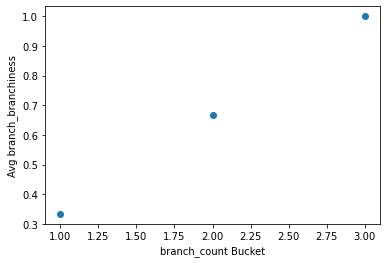

In [78]:
import matplotlib.pyplot as plt
import numpy as np

def vis_x_y_valuebound(data_df, x_bins, x_prop, y_prop):
    temp_df = data_df
    
    # Get bounds for numeric x-target
    x_bounds = (temp_df[x_prop].min(), temp_df[x_prop].max())

    # Bucket into bounded values for numeric x-target
    temp = [(i/x_bins, (i+1)/x_bins) for i in range(x_bins)]
    temp = [
        (x_bounds[0]+b_lo*(x_bounds[1]-x_bounds[0]), x_bounds[0]+b_hi*(x_bounds[1]-x_bounds[0]))
        for (b_lo,b_hi) in temp
    ]
    temp = [temp_df[temp_df[x_prop]>=b_lo][temp_df[x_prop]<=b_hi] for (b_lo,b_hi) in temp]
    temp = [(i[x_prop], i[y_prop]) for i in temp]

    _ = plt.scatter(
        [sum(x)/len(x) for (x,_) in temp], 
        [sum(y)/len(y) for (_,y) in temp]
    )
    _ = plt.xlabel(f'{x_prop} Bucket')
    _ = plt.ylabel(f'Avg {y_prop}')
    plt.show()

vis_x_y_valuebound(peruserpost_df[peruserpost_df['comment_count']==3], 3, 'branch_count', 'branch_branchiness')

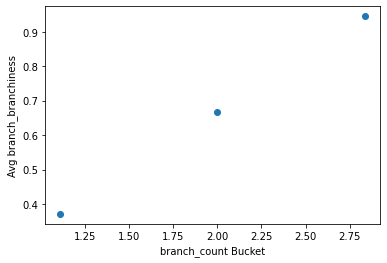

In [70]:
import matplotlib.pyplot as plt
import numpy as np

def vis_x_y_sortedbound(data_df, x_bins, x_prop, y_prop):
    temp_df = data_df
    temp_df = temp_df.sort_values(by=[x_prop], ascending=[True])
    
    # Get bounds for numeric x-target
    x_bounds = (temp_df[x_prop].min(), temp_df[x_prop].max())

    # Bucket into bounded values for numeric x-target
    temp = [(i/x_bins, (i+1)/x_bins) for i in range(x_bins)]
    temp = [temp_df.iloc[int(len(temp_df)*b_lo):int(len(temp_df)*b_hi)] for (b_lo,b_hi) in temp]
    temp = [(i[x_prop], i[y_prop]) for i in temp]

    _ = plt.scatter(
        [sum(x)/len(x) for (x,_) in temp], 
        [sum(y)/len(y) for (_,y) in temp]
    )
    _ = plt.xlabel(f'{x_prop} Bucket')
    _ = plt.ylabel(f'Avg {y_prop}')
    plt.show()

vis_x_y_sortedbound(peruserpost_df[peruserpost_df['comment_count']==3], 3, 'branch_count', 'branch_branchiness')

# Comparison: Controversialness vs Thread Size

In [79]:
# Merge in total post comment count
temp_peruserpost_df = peruserpost_df.merge(posts_df[['id', 'num_comments']], left_on='id', right_on='id')

temp_peruserpost_df[:5]

,id,link_id,author,branch_count,branch_branchiness,branch_degree_avg,branch_degree_med,comment_count,general_judgement_correct,num_comments
0,9zglje,t3_9zglje,ButtStuffJR,2,1.000000,2.0,2.0,2,1.0,146
1,9zglje,t3_9zglje,Basherrr559,1,0.500000,1.0,1.0,2,1.0,146
2,9zglje,t3_9zglje,Killairmanable,2,0.666667,1.5,1.5,3,1.0,146
3,9zglje,t3_9zglje,icarebot,1,1.000000,1.0,1.0,1,NaN,146
4,9zglje,t3_9zglje,Zizzy00,1,1.000000,1.0,1.0,1,NaN,146


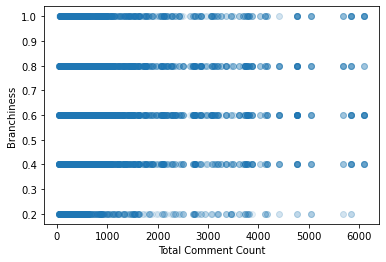

In [80]:
# Plot controversialness vs total comment count of each post, only counting users with CONST comments in each post
import math
import matplotlib.pyplot as plt
import numpy as np

comment_const = 5

# Show the ENTIRE breakdown lol this is ugly
temp_df = temp_peruserpost_df
temp_df = temp_df[temp_df['comment_count']==comment_const]

_ = plt.scatter(
    temp_df['num_comments'], 
    temp_df['branch_branchiness'], 
    alpha=0.1,
)
_ = plt.xlabel('Total Comment Count')
_ = plt.ylabel('Branchiness')
plt.show()

/tmp/ipykernel_27640/4205511605.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = [temp_df[temp_df[x_prop]>=b_lo][temp_df[x_prop]<=b_hi] for (b_lo,b_hi) in temp]


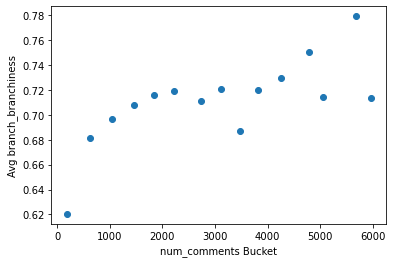

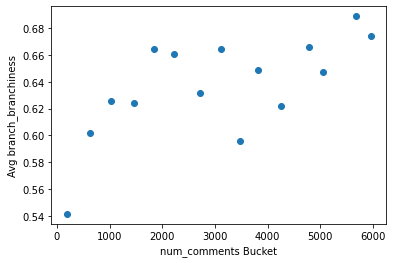

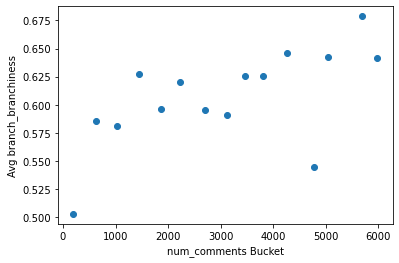

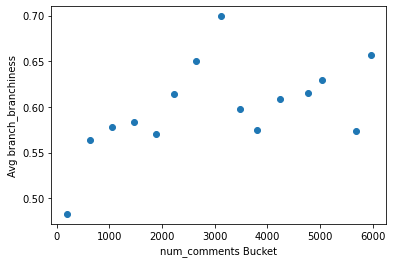

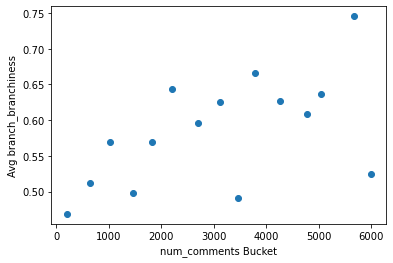

In [81]:
# Plot controversialness vs total comment count of each post, only counting users with CONST comments in each post
# BIN INTO VALUE BUCKETS FOR COMMENT COUNT

temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==3]
vis_x_y_valuebound(temp, 15, 'num_comments', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==5]
vis_x_y_valuebound(temp, 15, 'num_comments', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==7]
vis_x_y_valuebound(temp, 15, 'num_comments', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==9]
vis_x_y_valuebound(temp, 15, 'num_comments', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==11]
vis_x_y_valuebound(temp, 15, 'num_comments', 'branch_branchiness')

# Comparison: Controversialness vs Buzziness (Branchiness)

In [82]:
# Merge in controversialness
temp_peruserpost_df = peruserpost_df.merge(posts_df[['id', 'controversialness']], left_on='id', right_on='id')

temp_peruserpost_df[:5]

,id,link_id,author,branch_count,branch_branchiness,branch_degree_avg,branch_degree_med,comment_count,general_judgement_correct,controversialness
0,9zglje,t3_9zglje,ButtStuffJR,2,1.000000,2.0,2.0,2,1.0,0.555556
1,9zglje,t3_9zglje,Basherrr559,1,0.500000,1.0,1.0,2,1.0,0.555556
2,9zglje,t3_9zglje,Killairmanable,2,0.666667,1.5,1.5,3,1.0,0.555556
3,9zglje,t3_9zglje,icarebot,1,1.000000,1.0,1.0,1,NaN,0.555556
4,9zglje,t3_9zglje,Zizzy00,1,1.000000,1.0,1.0,1,NaN,0.555556


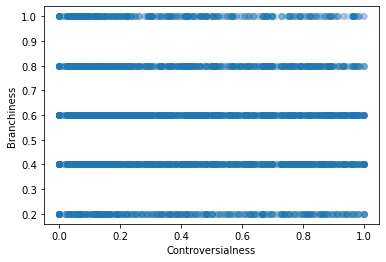

In [83]:
# Plot controversialness vs user buzziness of each post, only counting users with CONST comments in each post
import math
import matplotlib.pyplot as plt
import numpy as np

comment_const = 5

# Show the ENTIRE breakdown lol this is ugly
temp_df = temp_peruserpost_df
temp_df = temp_df[temp_df['comment_count']==comment_const]

_ = plt.scatter(
    temp_df['controversialness'], 
    temp_df['branch_branchiness'], 
    alpha=0.1,
)
_ = plt.xlabel('Controversialness')
_ = plt.ylabel('Branchiness')
plt.show()

/tmp/ipykernel_27640/4205511605.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = [temp_df[temp_df[x_prop]>=b_lo][temp_df[x_prop]<=b_hi] for (b_lo,b_hi) in temp]


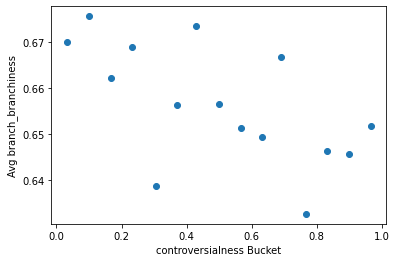

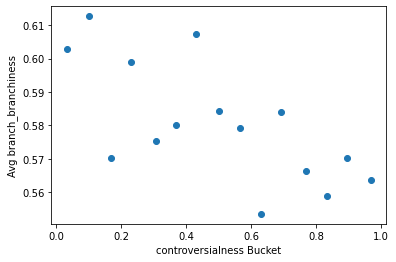

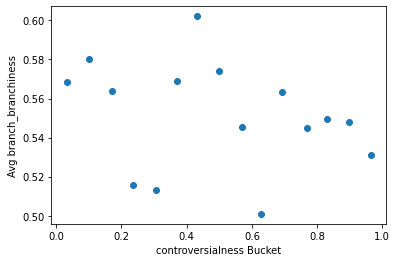

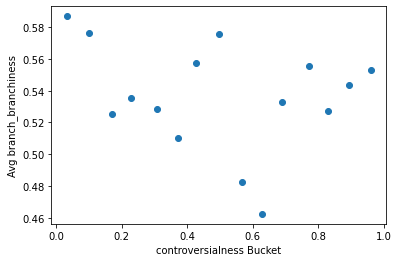

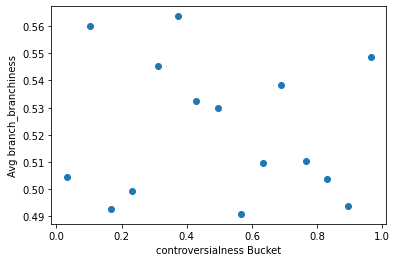

In [84]:
# Plot controversialness vs user buzziness of each post, only counting users with CONST comments in each post
# BIN INTO VALUE BUCKETS FOR CONTROVERSIALNESS

temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==3]
vis_x_y_valuebound(temp, 15, 'controversialness', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==5]
vis_x_y_valuebound(temp, 15, 'controversialness', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==7]
vis_x_y_valuebound(temp, 15, 'controversialness', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==9]
vis_x_y_valuebound(temp, 15, 'controversialness', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==11]
vis_x_y_valuebound(temp, 15, 'controversialness', 'branch_branchiness')

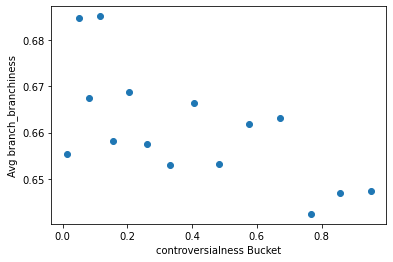

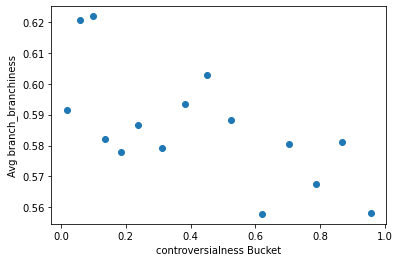

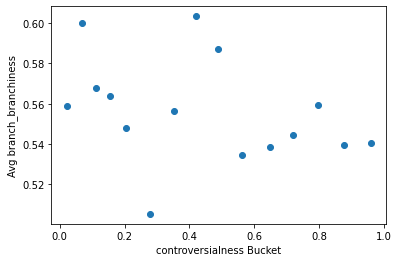

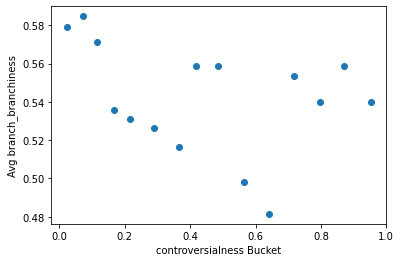

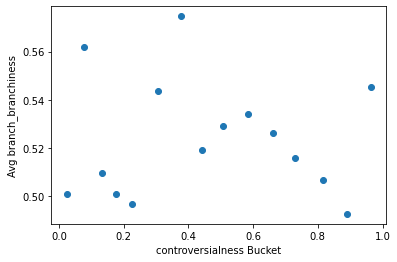

In [85]:
# Plot controversialness vs user buzziness of each post, only counting users with CONST comments in each post
# BIN INTO SORTED BUCKETS FOR CONTROVERSIALNESS

temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==3]
vis_x_y_sortedbound(temp, 15, 'controversialness', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==5]
vis_x_y_sortedbound(temp, 15, 'controversialness', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==7]
vis_x_y_sortedbound(temp, 15, 'controversialness', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==9]
vis_x_y_sortedbound(temp, 15, 'controversialness', 'branch_branchiness')
temp = temp_peruserpost_df[temp_peruserpost_df['comment_count']==11]
vis_x_y_sortedbound(temp, 15, 'controversialness', 'branch_branchiness')